In [1]:
import matplotlib.pyplot as plt
import numpy as np
import skimage.io as io

from IPython import display

## Look at the intensity histogram of substack cutout

It seems like when substack image was made, it converted int32 to uint16 while removing all negative values

In [2]:
substack = io.imread('../data/R04_tp1_substack (17-32).tif')
substack.shape

(16, 359, 359)

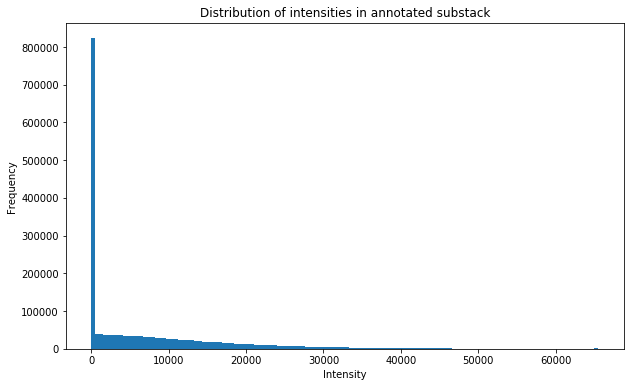

In [3]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(substack.ravel(), bins=128)
ax.set_xlabel('Intensity')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of intensities in annotated substack')
display.display(fig)

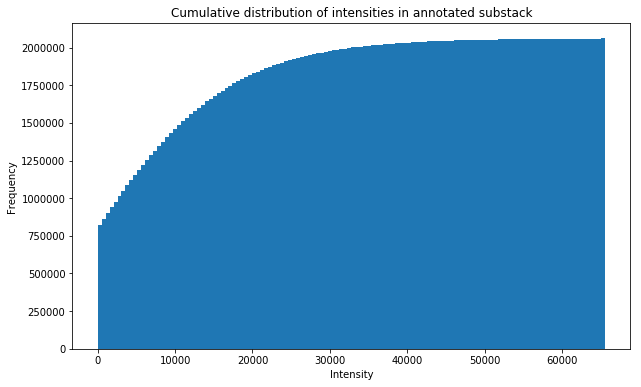

In [4]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(substack.ravel(), bins=128, cumulative=True)
ax.set_xlabel('Intensity')
ax.set_ylabel('Frequency')
ax.set_title('Cumulative distribution of intensities in annotated substack')
display.display(fig)

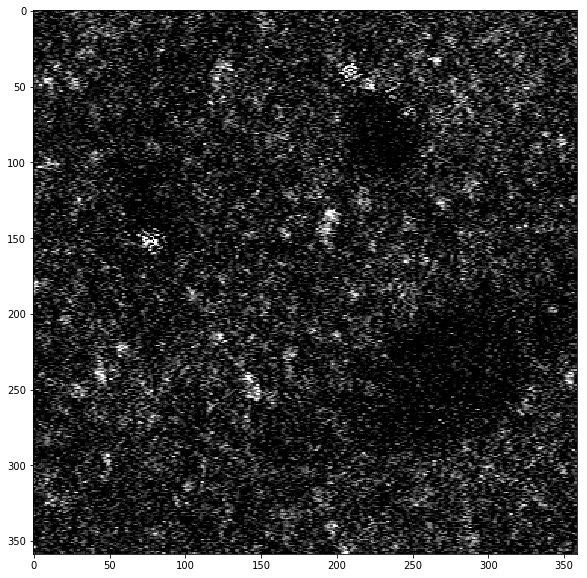

In [5]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(substack[0, :, :], cmap='gray')
display.display(fig)

## Richard states that the substack is from the center of tp01

This volume has dimensions 359x359x16 where z ranges from 17-32.

https://www.dropbox.com/sh/j86gw9az6svkfi5/AAAO4gvq1kR0HYmuW3iI-ARra?dl=0&lst=&preview=Image+information.docx

Let's compare the histogram of substack generated from tp01 from dropbox

In [6]:
tp01 = io.imread('../data/R04_tp1.tif')
tp01.shape

(50, 1024, 1024)

In [7]:
tp01_cutout = tp01[17-1:32, 512-179:512+179+1, 512-179:512+179+1]

In [8]:
tp01_cutout.shape

(16, 359, 359)

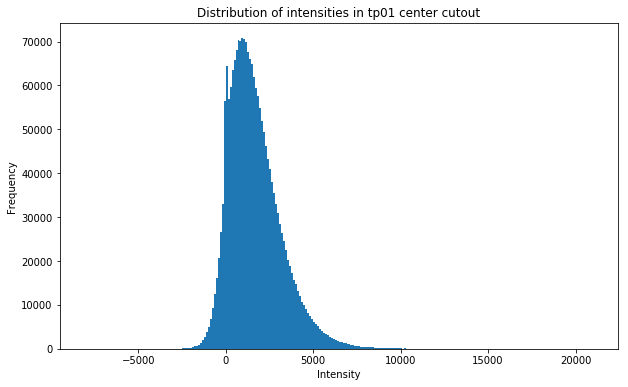

In [9]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(tp01_cutout.ravel(), bins=256)
ax.set_xlabel('Intensity')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of intensities in tp01 center cutout')
display.display(fig)

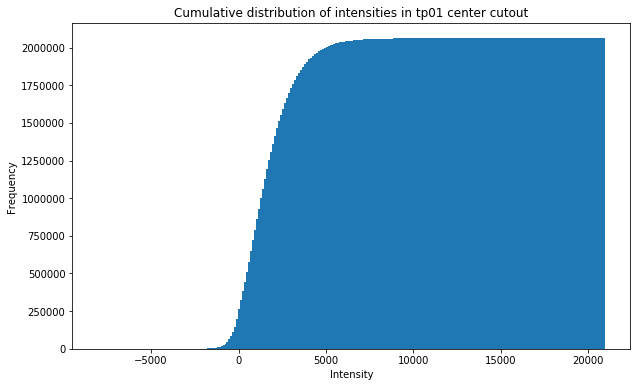

In [10]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(tp01_cutout.ravel(), bins=256, cumulative=True)
ax.set_xlabel('Intensity')
ax.set_ylabel('Frequency')
ax.set_title('Cumulative distribution of intensities in tp01 center cutout')
display.display(fig)

In [11]:
np.min(tp01_cutout), np.max(tp01_cutout)

(-8052.0, 20955.0)

## Center really meant "sort of" center, not "exact" center

Let's find the actual coordinates of the cutouts

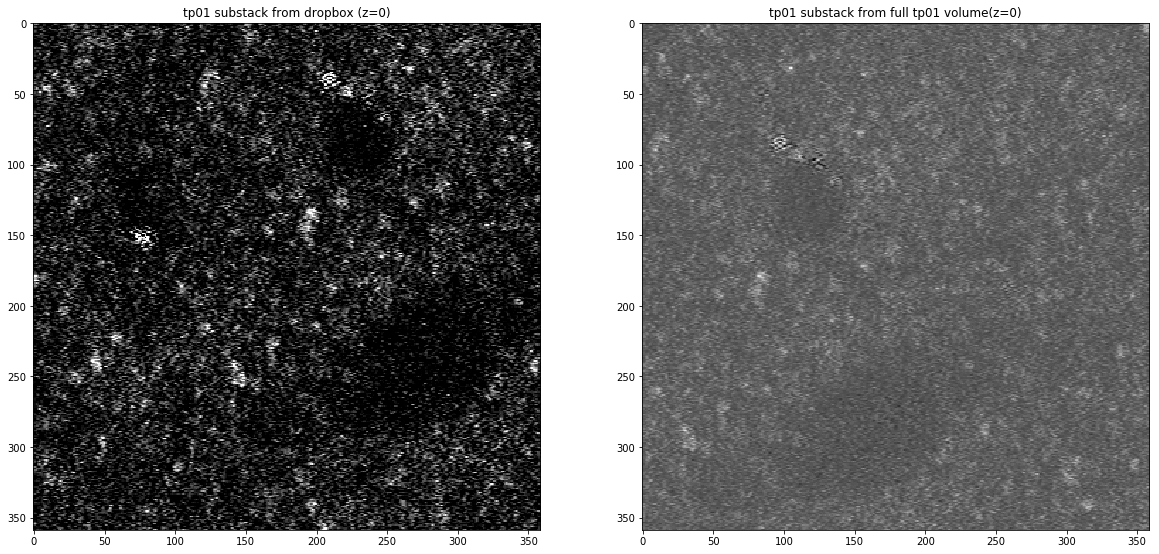

In [12]:
fig, ax = plt.subplots(ncols=2, figsize=(20, 10))
ax[0].imshow(substack[0, :, :], cmap='gray')
ax[0].set_title('tp01 substack from dropbox (z=0)')
ax[1].imshow(tp01_cutout[0, :, :], cmap='gray')
ax[1].set_title('tp01 substack from full tp01 volume(z=0)')
display.display(fig)

## Look at the entire tp01 volume

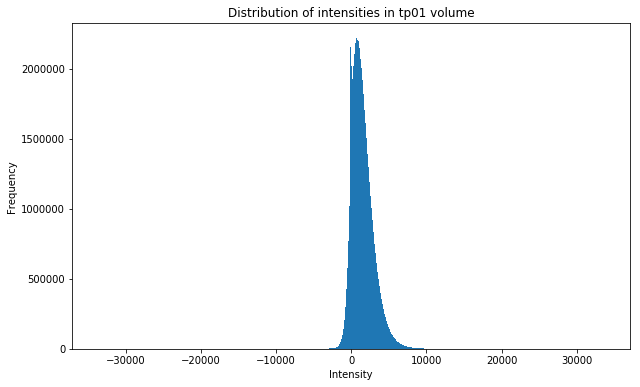

In [13]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(tp01.ravel(), bins=512)
ax.set_xlabel('Intensity')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of intensities in tp01 volume')
display.display(fig)

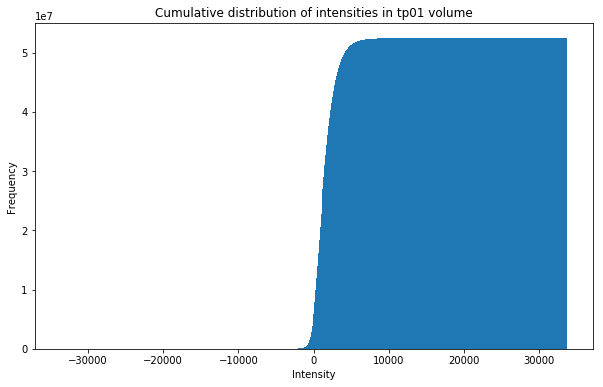

In [14]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(tp01.ravel(), bins=512, cumulative=True)
ax.set_xlabel('Intensity')
ax.set_ylabel('Frequency')
ax.set_title('Cumulative distribution of intensities in tp01 volume')
display.display(fig)

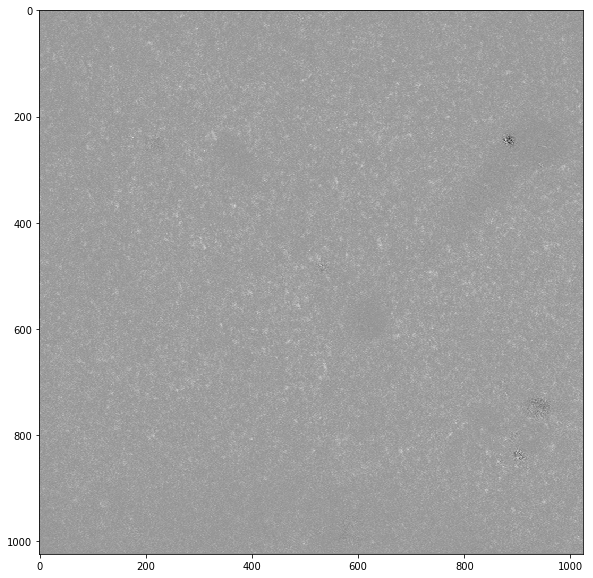

In [15]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(tp01[0, :, :], cmap='gray')
display.display(fig)

## Pull data from BOSS to compare

In [16]:
import sys
sys.path.append('../../pymeda/pymeda/')

from neurodataresource import NeuroDataResource

In [17]:
with open('../../pymeda/api_key.txt') as f:
    token = f.readline()
host = 'api.boss.neurodata.io'
collection = 'huganir'
experiment = '2p_somatosensory_SEP-GluA1_may2017'

In [18]:
ndr = NeuroDataResource(host, token, collection, experiment)

In [19]:
ndr.channels

['R04_tp1', 'R04_tp2', 'R04_tp3', 'R04_tp4']

In [20]:
ndr.max_dimensions

(60, 1024, 1024)

In [21]:
tp01_boss = ndr.get_cutout('R04_tp1', [0, 60], [0, 1024], [0, 1024])

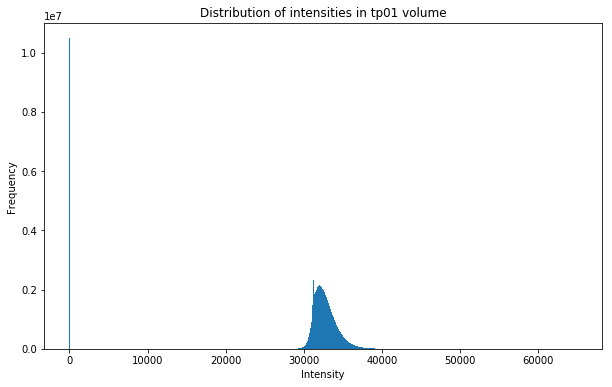

In [22]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(tp01_boss.ravel(), bins=512)
ax.set_xlabel('Intensity')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of intensities in tp01 volume')
display.display(fig)

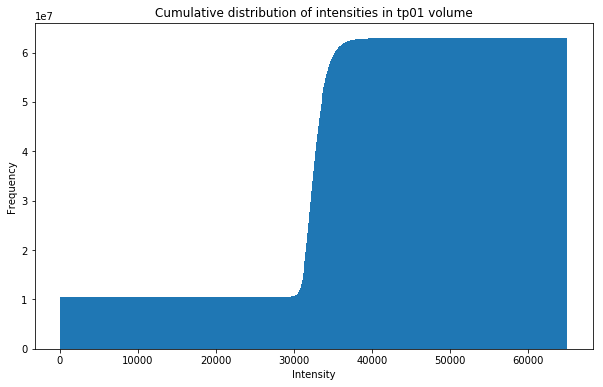

In [24]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(tp01_boss.ravel(), bins=512, cumulative=True)
ax.set_xlabel('Intensity')
ax.set_ylabel('Frequency')
ax.set_title('Cumulative distribution of intensities in tp01 volume')
display.display(fig)

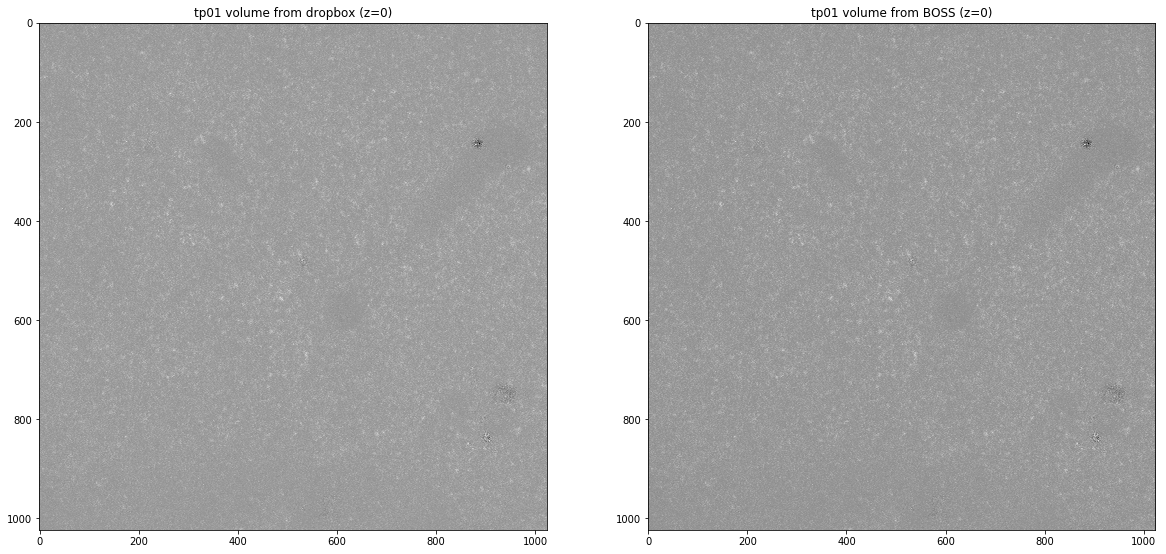

In [23]:
fig, ax = plt.subplots(ncols=2, figsize=(20, 10))
ax[0].imshow(tp01[0, :, :], cmap='gray')
ax[0].set_title('tp01 volume from dropbox (z=0)')
ax[1].imshow(tp01_boss[0, :, :], cmap='gray')
ax[1].set_title('tp01 volume from BOSS (z=0)')
display.display(fig)